In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print('testing123')

testing123


### Dataset Description
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

#### File descriptions
Variables with letters are categorical. Variables with 0/1 are binary values.

- train.csv - the training set
- test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(len(df.columns))
df.columns


378


Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
# Check if any null exist in all columns
for col in df.columns:
    if any(df[col].isnull()):
        print(col)
        continue

In [7]:
X = df.drop(columns=['ID','y'])
y = df['y']

print(X.shape)
print(y.shape)

(4209, 376)
(4209,)


In [8]:
## First of all, perform train_test_split first to prevent data leakage

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3367, 376)
(842, 376)
(3367,)
(842,)


In [9]:
cate_col = ['X0','X1','X2','X3','X4','X5','X6','X8']

In [10]:
for column in cate_col:
    print(f'{column}: ', X_train[column].nunique())

X0:  46
X1:  27
X2:  42
X3:  7
X4:  4
X5:  27
X6:  12
X8:  25


plot for X0: 


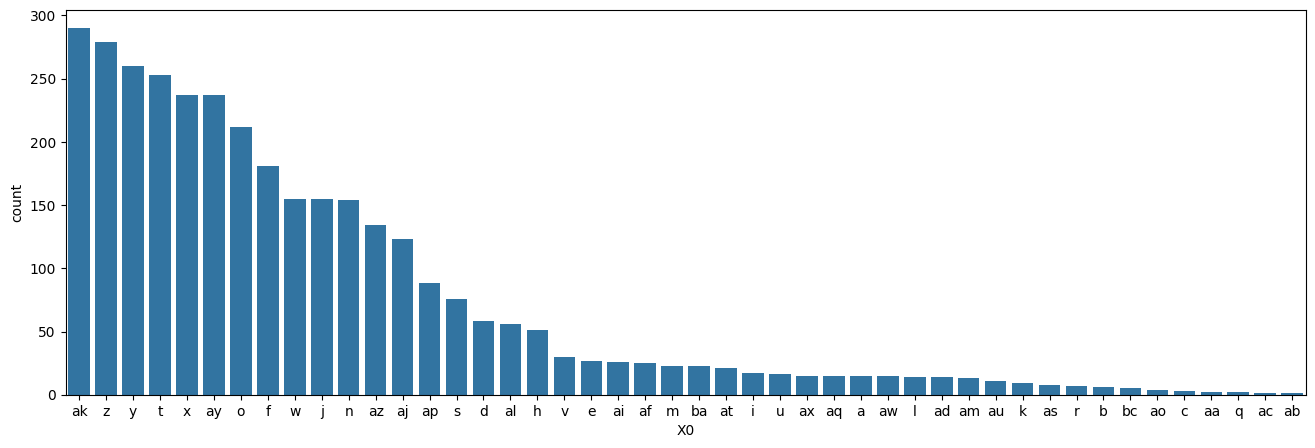

plot for X1: 


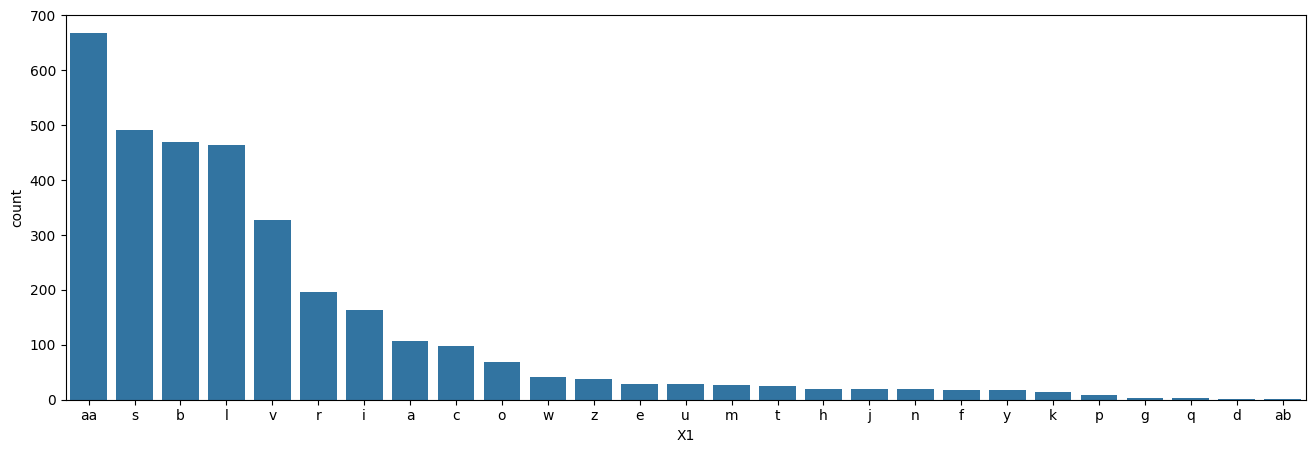

plot for X2: 


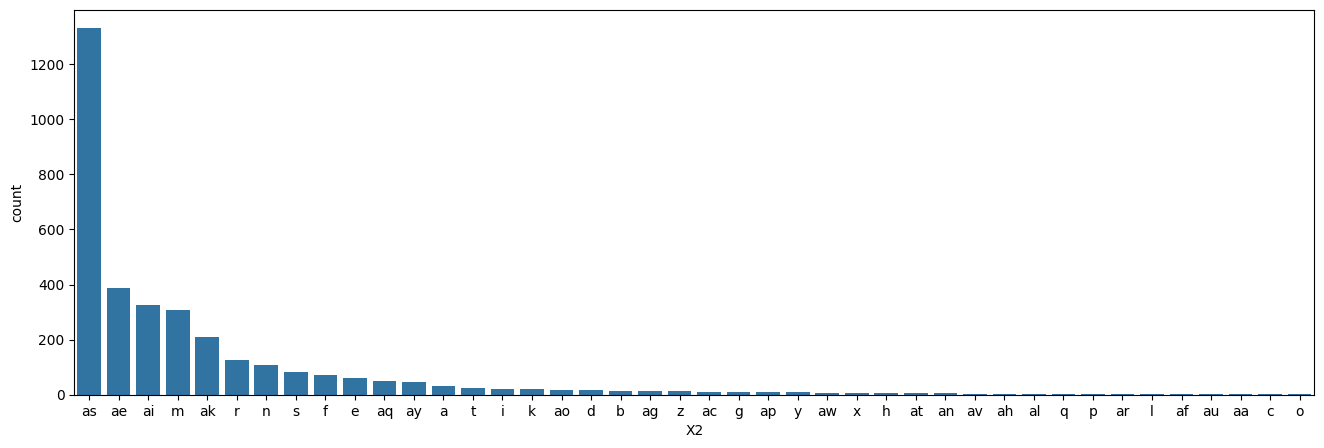

plot for X3: 


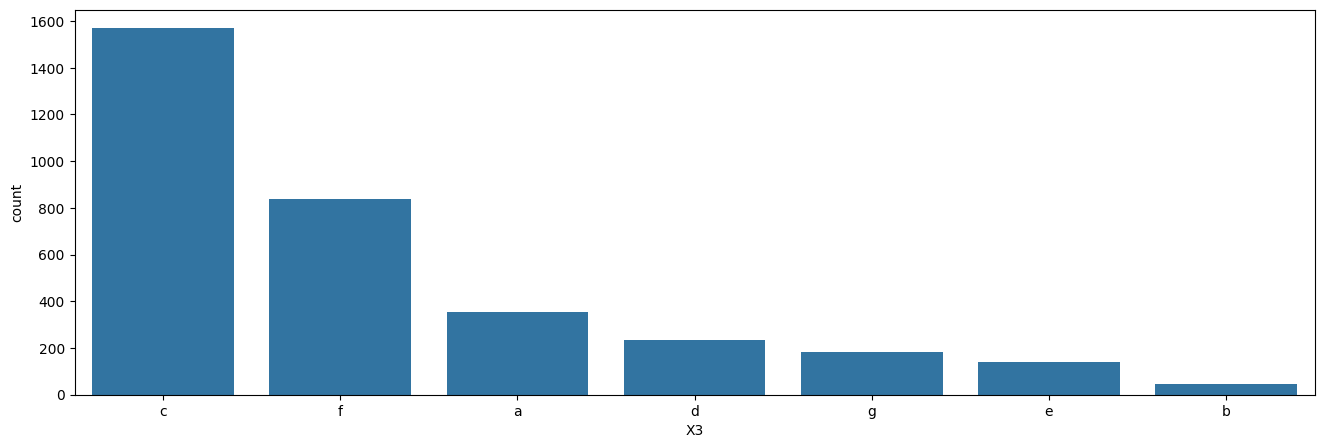

plot for X4: 


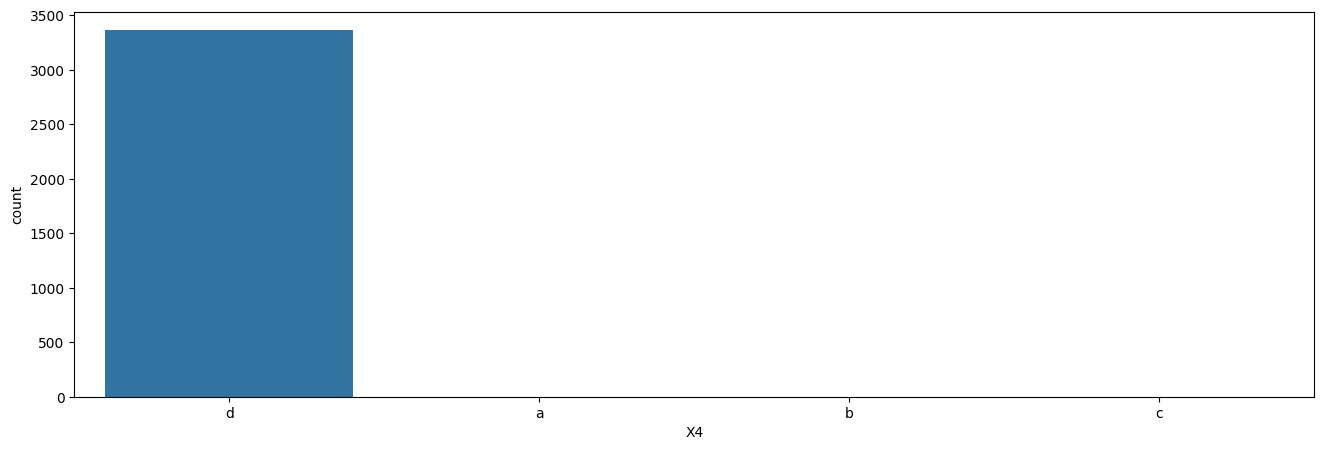

plot for X5: 


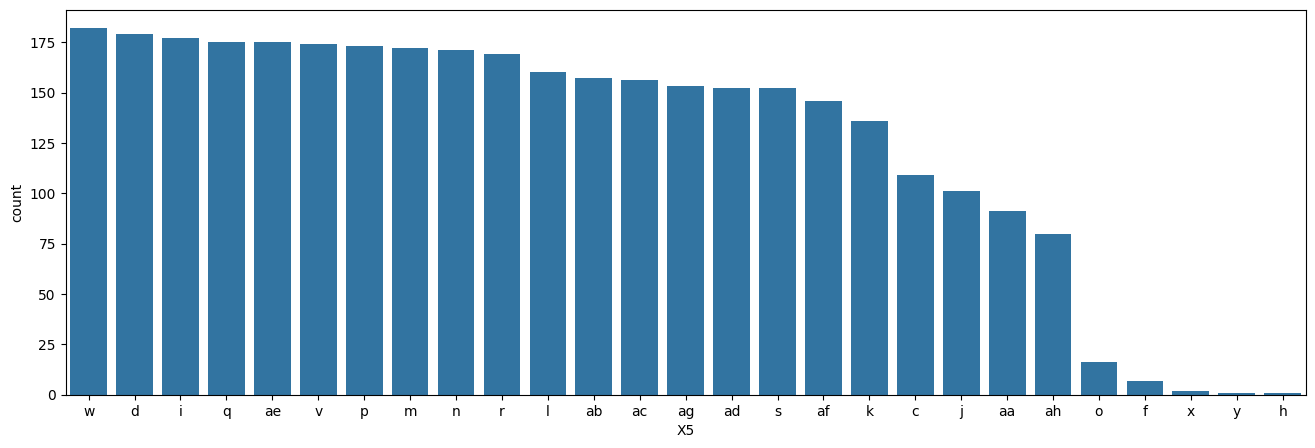

plot for X6: 


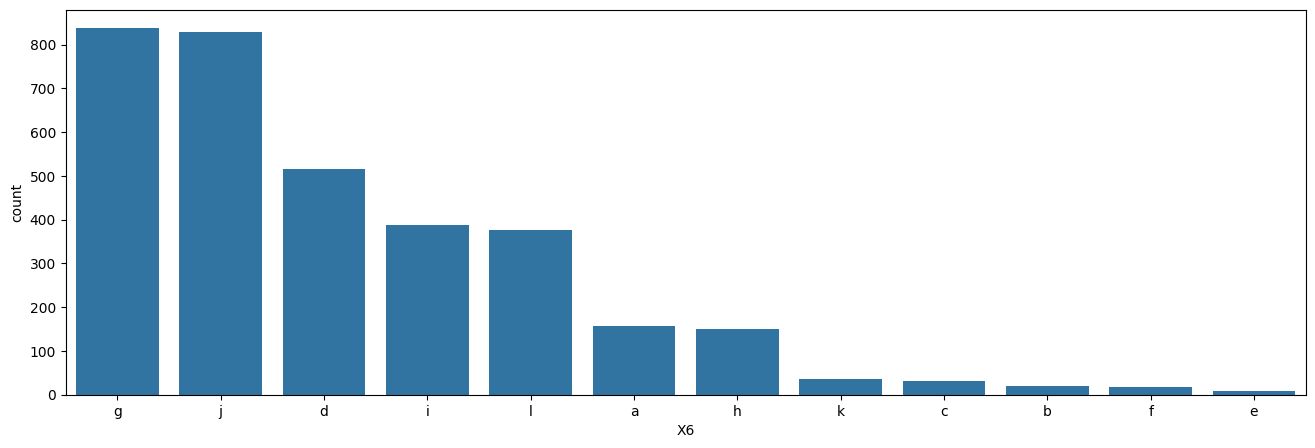

plot for X8: 


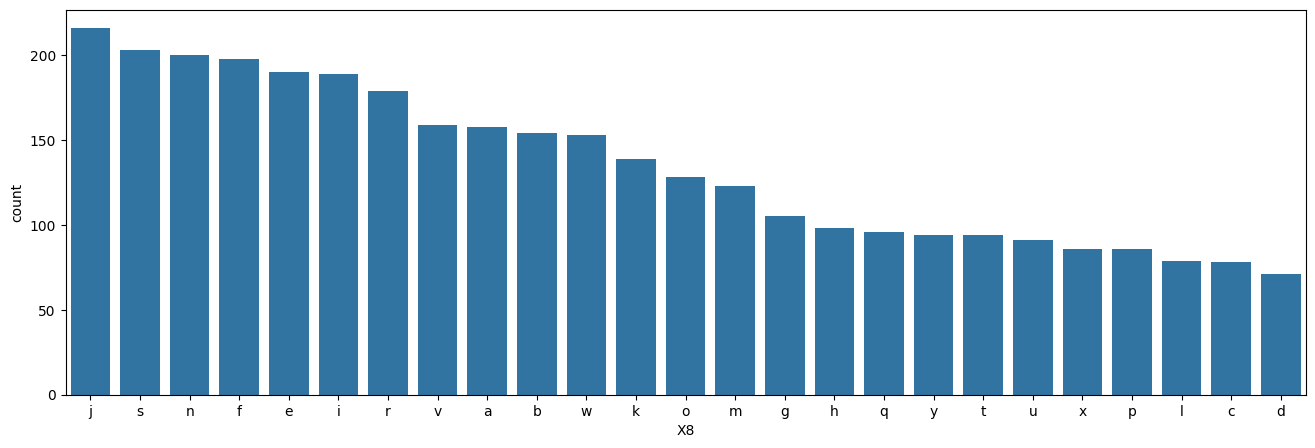

In [11]:
for column in cate_col:
    cat_data = X_train[column].value_counts()
    print(f'plot for {column}: ')
    plt.figure(figsize=(16,5))
    sns.barplot(cat_data)
    plt.show()

### Encoding method
- Mean Encoding => as the importance of categorical ranking is remain unknown
                => prevent curse of dimensionality like ohe does

In [12]:
# Mean Encoding for 'X0','X1','X2','X3','X5','X6','X8'
# For 'X4' binary encoding will do

target_col= ['X0','X1','X2','X3','X5','X6','X8']

def mean_encode(df_X,df_y,col):
    df_X['y'] = df_y
    mean_target = df_X.groupby(col)['y'].mean()
    df_X[col] = df_X[col].map(mean_target)
    df_X.drop(columns='y',inplace=True)

for col in target_col:
    mean_encode(X_train,y_train,col)

X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2103,113.805238,102.820000,103.760120,102.397762,d,99.813563,98.455238,101.276593,0,0,...,0,0,1,0,0,0,0,0,0,0
270,94.155423,99.054579,99.876124,96.831912,d,101.228249,101.314070,101.276593,0,0,...,0,0,0,0,0,0,0,0,0,0
2317,94.454910,99.992515,103.760120,101.835522,d,100.308529,101.314070,98.957658,0,0,...,1,0,0,0,0,0,0,0,0,0
1198,112.708581,101.854786,103.760120,100.105248,d,102.709554,101.421208,103.739841,0,0,...,1,0,0,0,0,0,0,0,0,0
1836,102.995612,105.708293,103.760120,101.835522,d,100.831600,99.063298,100.080647,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
# For 'X4', there is only 4 categories, and other than d, all is negligible
# encode d as 1, other as 0
print(X_train['X4'].value_counts())

# first approach
X_train['X4'] = np.where(X_train['X4']=='d',1,0)
# Alternative approach
# Encode 'd' as 1, others as 0
# df.loc[df['X4'] == 'd', 'X4'] = 1
# df.loc[df['X4'] != 1, 'X4'] = 0
X_train.head()

X4
d    3363
a       2
b       1
c       1
Name: count, dtype: int64


,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2103,113.805238,102.820000,103.760120,102.397762,1,99.813563,98.455238,101.276593,0,0,...,0,0,1,0,0,0,0,0,0,0
270,94.155423,99.054579,99.876124,96.831912,1,101.228249,101.314070,101.276593,0,0,...,0,0,0,0,0,0,0,0,0,0
2317,94.454910,99.992515,103.760120,101.835522,1,100.308529,101.314070,98.957658,0,0,...,1,0,0,0,0,0,0,0,0,0
1198,112.708581,101.854786,103.760120,100.105248,1,102.709554,101.421208,103.739841,0,0,...,1,0,0,0,0,0,0,0,0,0
1836,102.995612,105.708293,103.760120,101.835522,1,100.831600,99.063298,100.080647,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
# Scaling for target_col - Normalization

from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
X_train[target_col] = normalizer.fit_transform(X_train[target_col])
X_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2103,0.496049,0.857843,0.326766,0.666609,1,0.790358,0.292477,0.544068,0,0,...,0,0,1,0,0,0,0,0,0,0
270,0.237934,0.730489,0.265299,0.000000,1,0.841663,0.489601,0.544068,0,0,...,0,0,0,0,0,0,0,0,0,0
2317,0.241868,0.762212,0.326766,0.599271,1,0.808308,0.489601,0.278683,0,0,...,1,0,0,0,0,0,0,0,0,0
1198,0.481644,0.825198,0.326766,0.392040,1,0.895383,0.496988,0.825969,0,0,...,1,0,0,0,0,0,0,0,0,0
1836,0.354056,0.955531,0.326766,0.599271,1,0.827278,0.334404,0.407201,0,0,...,0,0,1,0,0,0,0,0,0,0


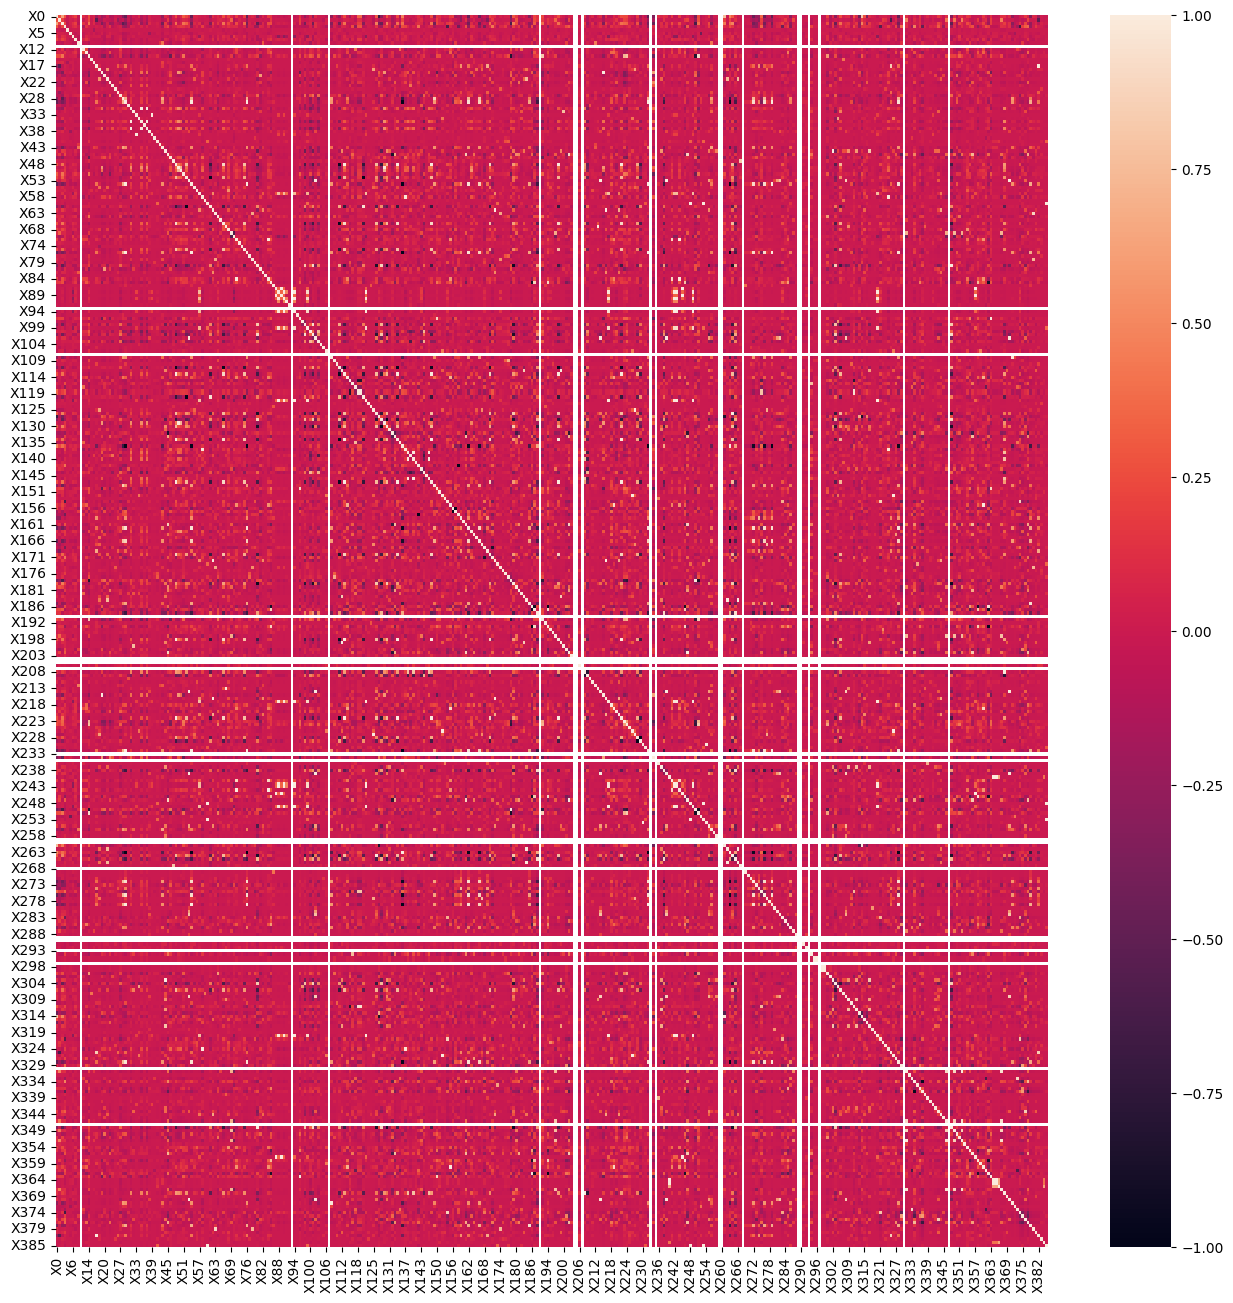

In [15]:
# To visualize the corr between X_train features
# Too many features, its hard to determine 
corr = X_train.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr)
plt.show()




In [16]:
# Calculate sparsity
def sparsity(df):
    low_thre = 1
    up_thre = 10

    total_elements = df.size
    non_zero_elements = np.count_nonzero(df)
    sparsity = (1.0 - (non_zero_elements / total_elements)) * 100 
    print("Sparsity of the dataset:", sparsity)

    if sparsity < low_thre:
        print('Low sparsity')
    elif sparsity > up_thre:
        print('High sparsity')
    else:
        print('Moderate sparsity')

sparsity(X_train)

Sparsity of the dataset: 82.51015804207293
High sparsity


In [17]:
## Do the same for test_data
def test_preprocess(df_X,df_y):
    for col in target_col:
        mean_encode(df_X,df_y,col)
    df_X['X4'] = np.where(df_X['X4']=='d',1,0)
    df_X[target_col] = normalizer.transform(df_X[target_col])

test_preprocess(X_test,y_test)

print(X_test.shape)
print(y_test.shape)

X_test.head()

(842, 376)
(842,)


,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1111,0.265662,0.762953,0.176802,0.676642,1,0.858608,0.363925,0.485765,0,0,...,0,0,1,0,0,0,0,0,0,0
2998,0.280776,0.762953,0.245996,0.676642,1,0.771234,0.408936,0.393563,0,0,...,0,0,1,0,0,0,0,0,0,0
818,0.280776,0.852118,0.283328,0.957695,1,0.833316,0.607901,0.130372,0,0,...,1,0,0,0,0,0,0,0,0,0
3300,0.230587,0.798101,0.176802,0.676642,1,0.853238,0.494160,0.329625,0,0,...,1,0,0,0,0,0,0,0,0,0
294,0.040022,0.852118,0.271574,-0.144186,1,0.783048,0.410080,0.709392,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Feature selection is skipped as we don know what exactly it is for X_features
#### Perform feature Extraction directly instead
1. PCA => based on the plotted cummulative explained variance ratio curve, the optimal value for n ranged from 50 to 150.
       => next, plot the mae result wrt to a classifier, the optimal value is n = 104.
(the dimensions reduced from 376 to 104, which is much better now)

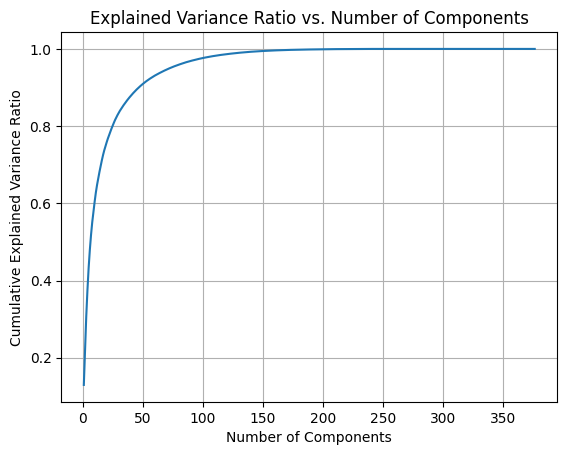

[0.12955779 0.21885703 0.30553897 0.37453853 0.43244219 0.47936267
 0.518403   0.55119853 0.57893077 0.60412608 0.62782274 0.6476277
 0.66476474 0.68132201 0.6967049  0.71154471 0.72519745 0.73737518
 0.74798097 0.7581575  0.76780644 0.77649394 0.78507624 0.79345512
 0.80143323 0.80885667 0.81607303 0.82244157 0.82861063 0.83440892
 0.83971372 0.84464385 0.84939248 0.8539837  0.85835958 0.86264085
 0.8667493  0.87082905 0.87457502 0.87829414 0.88183633 0.88532732
 0.88868582 0.89193679 0.89506657 0.89804195 0.90090242 0.90376137
 0.90651974 0.90913717 0.9116497  0.91413177 0.91643523 0.91870553
 0.92090839 0.92297451 0.92500993 0.92701767 0.92894562 0.93079717
 0.93255031 0.9342705  0.93595203 0.93758314 0.93920471 0.94077954
 0.94231457 0.94381534 0.94530395 0.94672738 0.94813675 0.94950698
 0.95084101 0.95214149 0.95340132 0.954639   0.95582458 0.95700626
 0.95812782 0.95924677 0.96031592 0.96137912 0.96243897 0.96345455
 0.96445697 0.96543655 0.96635268 0.9672438  0.96809944 0.96894

In [18]:
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA()  # Keep all components initially
pca.fit(X_train)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.plot(range(1, X_train.shape[1]+1), cumulative_variance_ratio, marker=None, linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

print(cumulative_variance_ratio)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=43)

pipe_LR = Pipeline(steps=[('PCA', PCA(n_components=50)),
                           ('LR', LinearRegression())]                     
)

pipe_LR.fit(X_train,y_train)
pred_train = pipe_LR.predict(X_valid)
pred_test = pipe_LR.predict(X_test)
pipe_LR

Pipeline(steps=[('PCA', PCA(n_components=50)), ('LR', LinearRegression())])

In [20]:
from sklearn.metrics import mean_absolute_error

print(f'MAE Train : {mean_absolute_error(pred_train,y_valid):.2f}')
print(f'MAE Test : {mean_absolute_error(pred_test,y_test):.2f}')


MAE Train : 5.95
MAE Test : 5.82


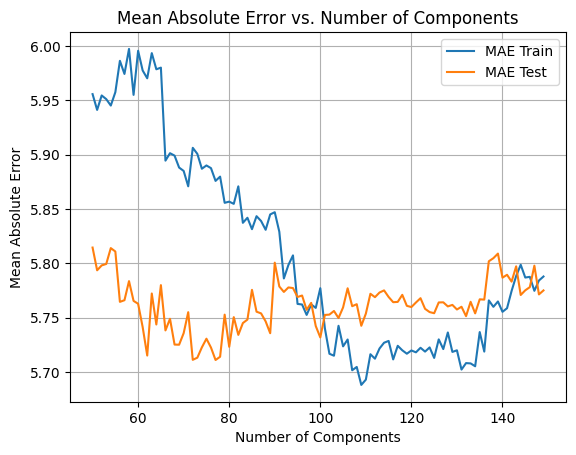

In [21]:
## PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

components_range = range(50, 150)
results_train = []
results_test =[]

for i in components_range:
    pipe_LR = Pipeline(steps=[('PCA', PCA(n_components=i)),
                           ('LR', LinearRegression())]                     
    )

    pipe_LR.fit(X_train,y_train)
    
    pred_train = pipe_LR.predict(X_valid)
    pred_test = pipe_LR.predict(X_test)

    results_train.append(mean_absolute_error(pred_train,y_valid))
    results_test.append(mean_absolute_error(pred_test,y_test))

    # Perform cross-validation
    #cv_results_train = -cross_val_score(pipe_LR, X_valid, y_valid, cv=5, scoring='neg_mean_absolute_error')
    #cv_results_test = -cross_val_score(pipe_LR, X_test, y_test, cv=5, scoring='neg_mean_absolute_error')

    #results_train.append(np.mean(cv_results_train))
    #results_test.append(np.mean(cv_results_test))

# Plot the results
plt.plot(components_range, results_train, label='MAE Train')
plt.plot(components_range, results_test, label='MAE Test')
plt.xlabel('Number of Components')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
for i in range(len(results_train)):
    if abs(results_train[i] - results_test[i]) <0.01:
        print(i+50, (results_train[i],results_test[i]))

# here we can determine the optimal value of n for pca after observing the results from graph
# by looking on the graph above, lowest mae and intersection point between train and test curve is around 100.
# by using the for loop above, we can detect the optimal n value as 104 (small difference & lower mae values) 
    

95 (5.762657204353989, 5.769046619610978)
96 (5.7621069728519805, 5.770368829828)
97 (5.7525488833570595, 5.757209636972995)
98 (5.762160658818816, 5.763615363011005)
104 (5.742541721414727, 5.749652139037944)
142 (5.774591592877698, 5.783142380658766)
143 (5.788304989310317, 5.797237738213882)
146 (5.787549967665291, 5.778073185141813)


## Regressor choice
- according to our dataset, all columns considered as categorical feaatures
1. Linear Regression
2. Ridge & Lasso Regression
3. Random Forest
4. XGBoost
5. SVR


In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

n_components = 104

pipe_LR = Pipeline(
    steps=[('PCA',PCA(n_components=n_components)),
           ('LR',LinearRegression())]
)

pipe_Lasso = Pipeline(
    steps=[('PCA',PCA(n_components=n_components)),
           ('Lasso',Lasso())]
)

pipe_Ridge = Pipeline(
    steps=[('PCA',PCA(n_components=n_components)),
           ('Ridge',Ridge())]
)

pipe_RF = Pipeline(
    steps=[('PCA',PCA(n_components=n_components)),
           ('RF',RandomForestRegressor())]
)

pipe_SVR = Pipeline(
    steps=[('PCA',PCA(n_components=n_components)),
           ('SVR',SVR())]
)

pipe_XGboost = Pipeline(
    steps=[('PCA',PCA(n_components=n_components)),
           ('XGBoost',GradientBoostingRegressor())]
)

pipelines = [pipe_LR,pipe_Lasso,pipe_Ridge,pipe_RF,pipe_SVR,pipe_XGboost]
map_dict = {0:'LR',
            1:'Lasso',
            2:'Ridge',
            3:'RF',
            4:'SVR',
            5:'XGBoost'}

for i,pipe in enumerate(pipelines):
    pipe.fit(X_train,y_train)
    pred_train = pipe.predict(X_valid)
    pred_test = pipe.predict(X_test)
    print(f'Results for {map_dict[i]}: ') 
    print('Train MAE: ',mean_absolute_error(pred_train,y_valid))
    print('Test MAE: ',mean_absolute_error(pred_test,y_test))
    print('')


Results for LR: 
Train MAE:  5.721288296595118
Test MAE:  5.762019974374844

Results for Lasso: 
Train MAE:  6.947181299104562
Test MAE:  6.570788872603962

Results for Ridge: 
Train MAE:  5.720533553662405
Test MAE:  5.744283945943286

Results for RF: 
Train MAE:  6.658326939870633
Test MAE:  6.30578458379605

Results for SVR: 
Train MAE:  5.690032037141895
Test MAE:  5.575591102202708

Results for XGBoost: 
Train MAE:  6.081393430957988
Test MAE:  6.135294833700495



In [29]:
# more robust way : implement cross validation score (neg MAE)
for i, pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    
    # Perform cross-validation
    cv_NMAE = np.mean(cross_val_score(pipe, X_valid, y_valid, cv=5, scoring='neg_mean_absolute_error'))
    
    # Calculate the mean cross-validation score
    
    # Predictions on test set
    pred_test = pipe.predict(X_test)
    
    print(f'Results for {map_dict[i]}: ') 
    print('Train NMAE: ', cv_NMAE)
    print('Test MAE: ', mean_absolute_error(pred_test, y_test))
    print('')

Results for LR: 
Train NMAE:  -6.7141804763715145
Test MAE:  5.7574212996351

Results for Lasso: 
Train NMAE:  -6.897667056165211
Test MAE:  6.570788871965399

Results for Ridge: 
Train NMAE:  -6.598984704431167
Test MAE:  5.754092608001425

Results for RF: 
Train NMAE:  -6.882878315609783
Test MAE:  6.304002310811713

Results for SVR: 
Train NMAE:  -6.989658481764875
Test MAE:  5.574106039355744

Results for XGBoost: 
Train NMAE:  -6.788462039154704
Test MAE:  6.164754912491685



In [30]:
y_pred = pipe_SVR.predict(X_test)

<Figure size 800x800 with 0 Axes>

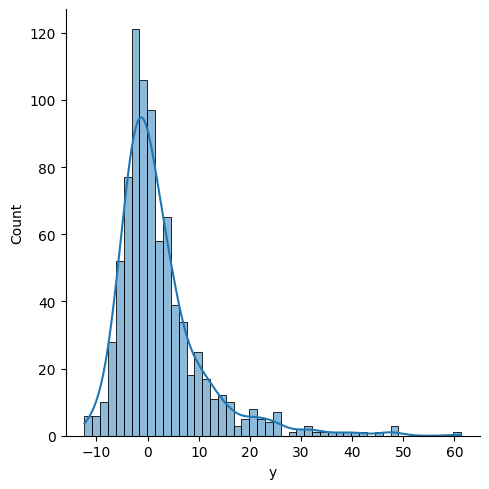

In [31]:
plt.figure(figsize = (8,8))
sns.displot(y_test-y_pred,kde=True)
plt.show()

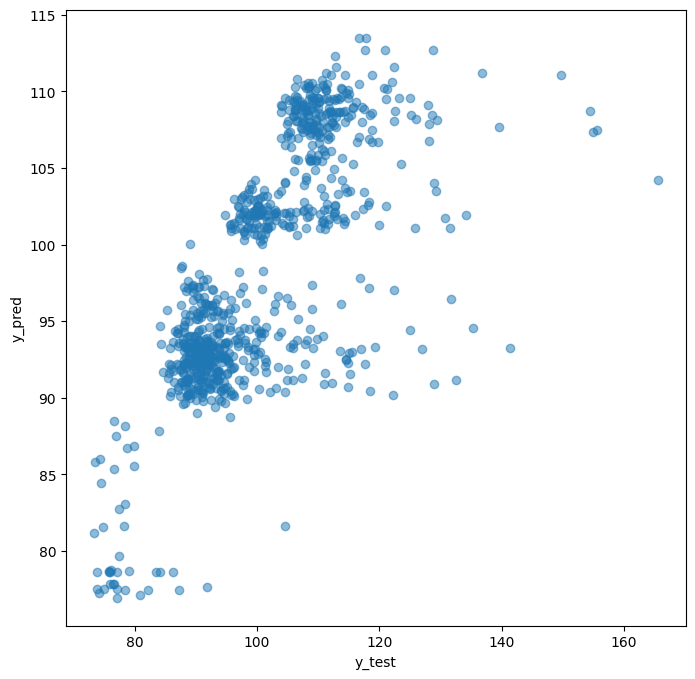

In [32]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Conclusion:
- n_components for PCA will be 101
- SVR is the best among those regressors due to:
    1. highest NMAE : -6.989658481764875
    2. lowest NMAE : 5.574106039355744

- Fine tuning on SVR next (using pipeline for whole process)